# Part II - Loan Data from Prosper
## by Oliwia Koteluk

## Investigation Overview
In this investigation, I wanted to look at the features which might be usefull in the predicting the amount of received loans. There a lot of them which mmight be taken into account such as: monthly income, date, occupation, term, house ownership and many more.


## Dataset Overview
To be able to perform the exploration, I used the dataset which consist of more than 110 thousands of loans made by Prosper across the years 2005 and 2014.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('./prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Choose only neccessary columns (they are described in Preliminary Warings section)
column_list = ['ListingKey', 'DateCreditPulled', 'Term', 'LoanStatus', 'Investors', 'BorrowerAPR', 'BorrowerRate', 
               'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 
               'IsBorrowerHomeowner', 'TotalCreditLinespast7years', 'PercentFunded', 'MonthlyLoanPayment', 
               'LoanOriginalAmount', 'LoanMonthsSinceOrigination', 'StatedMonthlyIncome', 'IncomeRange', 
               'CreditScoreRangeLower', 'CreditScoreRangeUpper']
loans = df[column_list]
loans.head()

,ListingKey,DateCreditPulled,Term,LoanStatus,Investors,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,...,IsBorrowerHomeowner,TotalCreditLinespast7years,PercentFunded,MonthlyLoanPayment,LoanOriginalAmount,LoanMonthsSinceOrigination,StatedMonthlyIncome,IncomeRange,CreditScoreRangeLower,CreditScoreRangeUpper
0,1021339766868145413AB3B,2007-08-26 18:41:46.780000000,36,Completed,258,0.16516,0.1580,0,CO,Other,...,True,12.0,1.0,330.43,9425,78,3083.333333,"$25,000-49,999",640.0,659.0
1,10273602499503308B223C1,2014-02-27 08:28:14,36,Current,1,0.12016,0.0920,2,CO,Professional,...,False,29.0,1.0,318.93,10000,0,6125.000000,"$50,000-74,999",680.0,699.0
2,0EE9337825851032864889A,2007-01-02 14:09:10.060000000,36,Completed,41,0.28269,0.2750,0,GA,Other,...,False,3.0,1.0,123.32,3001,86,2083.333333,Not displayed,480.0,499.0
3,0EF5356002482715299901A,2012-10-22 11:02:32,36,Current,158,0.12528,0.0974,16,GA,Skilled Labor,...,True,29.0,1.0,321.45,10000,16,2875.000000,"$25,000-49,999",800.0,819.0
4,0F023589499656230C5E3E2,2013-09-14 18:38:44,36,Current,20,0.24614,0.2085,2,MN,Executive,...,True,49.0,1.0,563.97,15000,6,9583.333333,"$100,000+",680.0,699.0


In [4]:
# The `DateCreditPulled` is of type str and I want it to be date time format
loans['DateCreditPulled'] = pd.to_datetime(loans['DateCreditPulled'])

# To allow efficient ploting, the new column `YearCreditPulled` will be added based on the `DateCreditPulled`
loans['YearCreditPulled'] = pd.DatetimeIndex(df['DateCreditPulled']).year

In [5]:
# convert `LoanStatus` and `IncomeRange` into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Chargedoff', 'Defaulted', 'Past Due (>120 days)', 'Past Due (91-120 days)', 
                                   'Past Due (61-90 days)', 'Past Due (31-60 days)', 'Past Due (16-30 days)', 
                                   'Past Due (1-15 days)', 'Cancelled', 'Current', 'FinalPaymentInProgress', 
                                   'Completed'],
                    'IncomeRange': ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                    '$75,000-99,999', '$100,000+'],
                    'Term':[12, 36, 60]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [6]:
# Column `ListingCategory (numeric)` have numbers in it, but those numbers correspond with LoansType (described more closely
# in Preliminary Warnings section of this notebook)

# I will add another column to this dataframe with names of `ListingCategory` named `ListingCategory (name)`

category_dict = {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 
                 4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 
                 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 
                 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle', 
                 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}

loans['ListingCategory (name)'] = loans['ListingCategory (numeric)'].map(category_dict)

## Loan amount distribution
In the very beggining, let's take a closer look at the main variable of interest in this exploration 

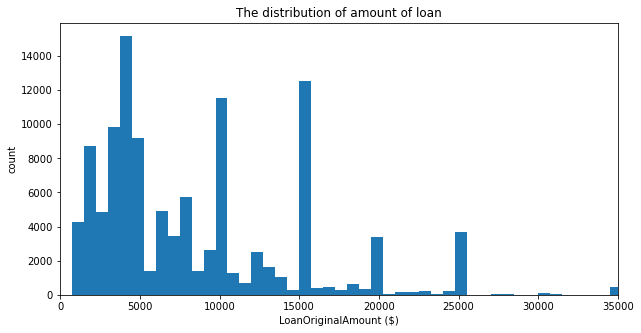

In [7]:
bins_amount = np.arange(0, loans['LoanOriginalAmount'].max()+750, 750)

plt.figure(figsize=(10,5))

plt.hist(loans['LoanOriginalAmount'], bins=bins_amount)
plt.title('The distribution of amount of loan')
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('count')
plt.xlim(0, 35000);

For the amount of loan in this dataset, we can observe several peaks across the distribution.

## Loan amount vs date
The dataset contains data from several different years. Over the years, the economic situation has changed, which could have had an impact on the number of loans granted.

In [8]:
# Processing the data for the visualization
loans_agg = loans.groupby('YearCreditPulled')['LoanOriginalAmount'].mean().to_frame()
loans_agg.reset_index(level=0, inplace=True)
loans_agg.rename(columns={'LoanOriginalAmount':'LoanOriginalAmount_mean'}, inplace=True)
loans_agg

,YearCreditPulled,LoanOriginalAmount_mean
0,2005,3903.625000
1,2006,4878.130394
2,2007,7064.441824
3,2008,5989.777346
4,2009,4369.210263
5,2010,4823.246709
6,2011,6692.680836
7,2012,7879.574329
8,2013,10609.520454
9,2014,11902.113989


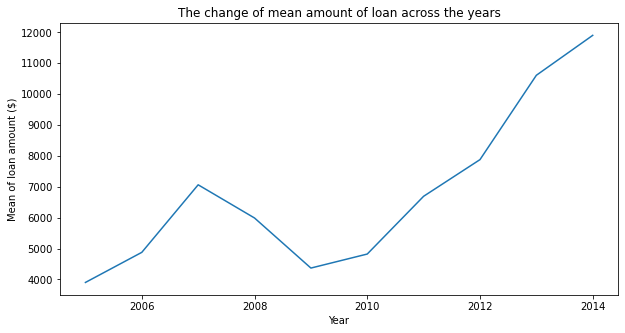

In [9]:
plt.figure(figsize=(10,5))
sb.lineplot(data=loans_agg, x='YearCreditPulled', y='LoanOriginalAmount_mean')

plt.xlabel('Year')
plt.ylabel('Mean of loan amount ($)')

plt.title('The change of mean amount of loan across the years');

The average loans amount has been changing over the year. Since 2009 (till 2014), this number has continued to increase over time.

## Loan amount vs house ownership
In the dataset, there is also the information about the fact if borrower possess the house or not. It seems natural to say that if the borrower possess the property, he/she has a chance to receive the bigger amount of loan. Let's fins out what the relationship in this case looks like.

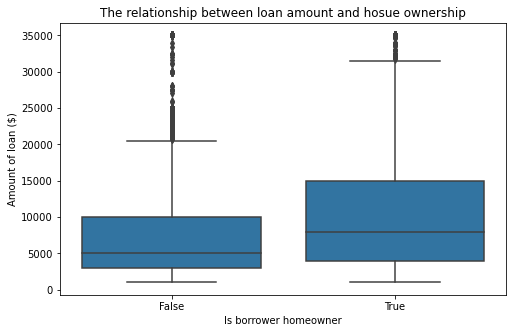

In [10]:
plt.figure(figsize=(8,5))

sb.boxplot(data=loans, x='IsBorrowerHomeowner', y='LoanOriginalAmount', color=sb.color_palette()[0])

plt.xlabel('Is borrower homeowner')
plt.ylabel('Amount of loan ($)')

plt.title('The relationship between loan amount and hosue ownership');

As expected, borrowers that own a house received the bigger amount of loan.

## Loan amount vs income range
Now, let's find out if people who earns more in fact received bigger amount of loans.

In [11]:
# For this part the borrowers who earns more than $1
income_list = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

loans_to_plot = loans[loans['IncomeRange'].isin(income_list)]
loans_to_plot.head()

,ListingKey,DateCreditPulled,Term,LoanStatus,Investors,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,...,PercentFunded,MonthlyLoanPayment,LoanOriginalAmount,LoanMonthsSinceOrigination,StatedMonthlyIncome,IncomeRange,CreditScoreRangeLower,CreditScoreRangeUpper,YearCreditPulled,ListingCategory (name)
0,1021339766868145413AB3B,2007-08-26 18:41:46.780,36,Completed,258,0.16516,0.1580,0,CO,Other,...,1.0,330.43,9425,78,3083.333333,"$25,000-49,999",640.0,659.0,2007,Not Available
1,10273602499503308B223C1,2014-02-27 08:28:14.000,36,Current,1,0.12016,0.0920,2,CO,Professional,...,1.0,318.93,10000,0,6125.000000,"$50,000-74,999",680.0,699.0,2014,Home Improvement
3,0EF5356002482715299901A,2012-10-22 11:02:32.000,36,Current,158,0.12528,0.0974,16,GA,Skilled Labor,...,1.0,321.45,10000,16,2875.000000,"$25,000-49,999",800.0,819.0,2012,Motorcycle
4,0F023589499656230C5E3E2,2013-09-14 18:38:44.000,36,Current,20,0.24614,0.2085,2,MN,Executive,...,1.0,563.97,15000,6,9583.333333,"$100,000+",680.0,699.0,2013,Home Improvement
5,0F05359734824199381F61D,2013-12-14 08:26:40.000,60,Current,1,0.15425,0.1314,1,NM,Professional,...,1.0,342.37,15000,3,8333.333333,"$100,000+",740.0,759.0,2013,Debt Consolidation


In [12]:
# Define new categories for `IncomeRange`
ordinal_var_dict = {'IncomeRange': ['$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                                    '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans_to_plot[var] = loans_to_plot[var].astype(ordered_var)

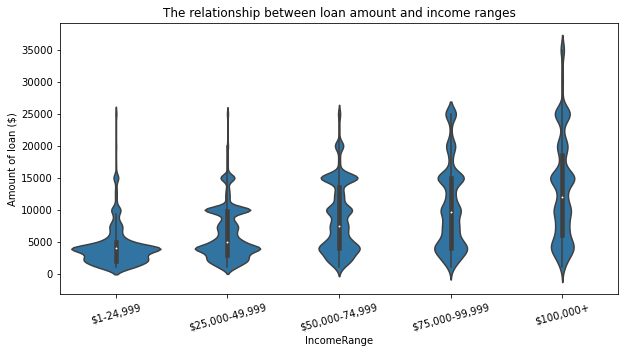

In [13]:
plt.figure(figsize=(10,5))
sb.violinplot(data=loans_to_plot, x='IncomeRange', y='LoanOriginalAmount', color=sb.color_palette()[0])
plt.xticks(rotation=15)

plt.ylabel('Amount of loan ($)')

plt.title('The relationship between loan amount and income ranges');

## More complex relationship - loan amount by year and house ownership
It is unlikely that the amount of granted loan will depend on only one feature, so let's look at combining more features when predicting.

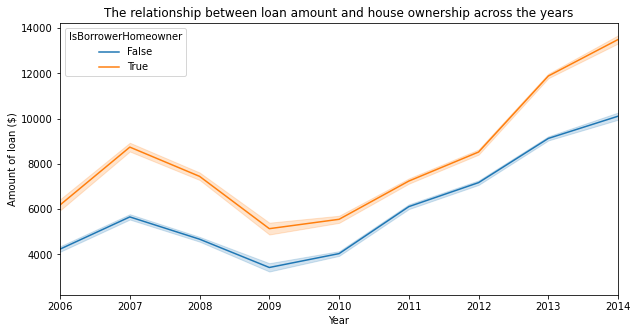

In [14]:
plt.figure(figsize=(10,5))
sb.lineplot(data=loans, x='YearCreditPulled', y='LoanOriginalAmount', hue='IsBorrowerHomeowner')

# Because all the loan originated before 2006 have the IsBorrowerHomeowner=False, I will limit the x axis
plt.xlim(2006, 2014)

plt.xlabel('Year')
plt.ylabel('Amount of loan ($)')

plt.title('The relationship between loan amount and house ownership across the years');

Borrowers who own the house received bigger amount of loans no matter of the year they pulled the loan than those who haven;t hadd the property. However in some years (like 2014) this change was bigger.

## More complex relationship - loan amount by year and income range
Now, let's find out what is the relationship between loan amount and income range across time. Have the more earning borrowers  always taken bigger loans?

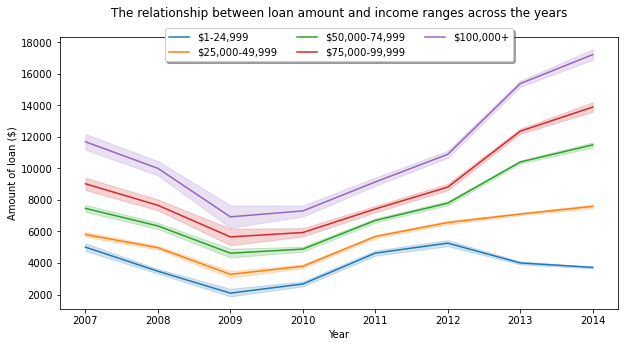

In [15]:
plt.figure(figsize=(10,5))
sb.lineplot(data=loans_to_plot, x='YearCreditPulled', y='LoanOriginalAmount', hue='IncomeRange')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

plt.xlabel('Year')
plt.ylabel('Amount of loan ($)')

plt.title('The relationship between loan amount and income ranges across the years', pad=20);

As you might expect across all analyzed period, the bigger the income the bigger the amount of loan. This situation haven't changed thoghtout the years. What's interesting is that only in the group with the lowest income, the amount of loan decreases since 2012.

## Cumulative effect of variables
Analyzed categorical features might also have the impact on each other, not only on the amount of loan. They might strengthened each other in terms of predicting the amount of loan.

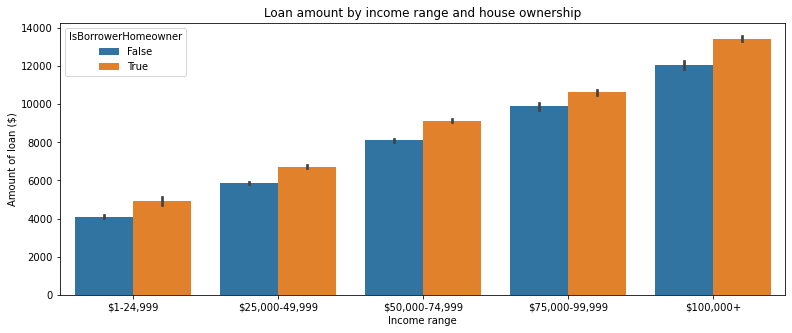

In [16]:
plt.figure(figsize=(13,5))
sb.barplot(data=loans_to_plot, x='IncomeRange', y='LoanOriginalAmount', hue='IsBorrowerHomeowner')

plt.xlabel('Income range')
plt.ylabel('Amount of loan ($)')

plt.title('Loan amount by income range and house ownership');

Income range and house ownership have the addictive (strengthening) effect on each other. In this case it means that when the borrower own a house, he/she can count on a larger loan while still in the same income range.

## Conclusion
The amount of loan is the features that is influenced by many different variables. Some of them are year the credit was pulled, income range and the house ownership. Among these the borrower who earns a lot of many, additionally owns the house and pulled the loan in 2014 can count on the biggest amount of loan.